In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


# Tutorial on setting up and using colorblind package inside Jupyter Notebook

### Table of Contents

* [**Overview**](#overview)
    * [Background](#background)
    * [Motivations](#motivations)
    
    
* [**Introducing 'colorblind'**](#colorblind)
    * [Installation](#installation)
    
    
* [**Types of colorblindness**](#types)
    * [Red color weakness (protanopia)](#red)
    * [Green color weakness (deuteranopia)](#green)
    * [Blue/ yellow color weakness (tritanopia)](#blue)
    
    
* [**What does this have to do with Data Science?**](#ds)
    * [Support Vector Machine Example](#svm)
    * [Colorblind SVM](#sim_SVM)
    
    
* [**Conclusion**](#conclusion)
    * [Redundant encoding](#redundant)
    * [Colorblind palletes](#palletes)

## Overview <a type='anchor' name='overview'>

In this tutorial, I will demonstrate how to implement the Python module `colorblind` to check your figures for color blindness/ deficiency.

### Background <a type='anchor' name='background'>

According to the [NIH's National Eye Institute](https://www.nei.nih.gov/learn-about-eye-health/eye-conditions-and-diseases/color-blindness), about one out of 12 men are color blind. Although less at risk, about 1 of every 200 women expenrience color blindness. Although everyone sees colors differently, color blind individuals have a much harder time differentiating between colors. Research shows that there are different types of color blindness, but the 2 most common are red-green weakness/ blindness and blue-yellow weakness, which will be demonstrated later in the tutorial.

It is important for data scientists and analysts to do a spotcheck of their data visualizations every now and then - our figures are only useful when people can interpret them, and someone who can't tell a red dot apart from a green dot would not find any use for a scatterplot with only red and green dots.

### Motivations <a type='anchor' name='motivations'>

Colblindor (https://www.color-blindness.com/coblis-color-blindness-simulator/) is a website where users can upload their own images and apply color filters to see how a colorblind person would see colors in a picture. The website is great for those who are curious about how the world looks like for a colorblind person. Although it is a very useful tool, as an aspiring data scientist, I have used it fewer times than I would have liked, for several reasons:

1) I find it cumbersome having to save a draft of a plot, go to the website, check the filters, and then go back to my Notebook/ script to make changes.

2) If I'm working on internal/ confidential data, I don't want to first upload it to an external website.

Thus, I wanted to find if there exists a module that allows Python users to apply colorblind filters to figures on-the-go, without breaking their workflow, and hallelujah, it exists!

## Introducing `colorblind` <a type='anchor' name='colorblind'>


The [`colorblind` package](https://pypi.org/project/colorblind/) was released on January 11, 2021, so it is relatively new. Aside from the user guide included in the above link, I have not found another blog post or tutorial demonstrating how to use it and what it does in practice. The link to the package is the top result for "python colorblind" in Google, however, subsequent links are about Python colorblind palletes and not how to use `colorblind` in data visualization with Python.

I am writing this tutorial to demonstrate how to use the module to spot check your data visualizations and what you need to run it in a Jupyter Notebook.

### Installation <a type='anchor' name='installation'>

The module can be installed with `pip install colorblind`
You will also need `OpenCV`, `matplotlib` and `numpy`, so make sure to have the modules installed on your system/ virtual environment. Side note: I have been using a 2021 Macbook Pro with the brand new M1 Max chip, so I've been extra skittish about using virtual environments since some modules haven't offered native support for Apple Silicon chips - luckily this isn't the case with `colorblind`.




# Types of colorblindness <a type='anchor' name='types'>


As a quick example, I will first use the module to apply color blindness filters on a normal photo to demonstrate the different kinds of color blindness before exploring how data scientists can benefit from using this package in their data science workflow.

This is a screenshot of the 2018 World Cup match between Russia (red) and Saudi Arabia (green). If you can immediately tell the difference between the 2 teams, congratulations, you do not have red-green color blindness. If you have difficulty differentiating them, Russia is the team with white pants, and I hope this tutorial isn't where you learned that you are red-green colorblind.

<br>
<img src="world_cup.jpg" width="50%vw" align="center"></img>

<br>
Using this photo and the `colorblind` module, I can demonstrate what red-green color blind people see when they look at the picture. First, let's import our modules.

In [2]:
from colorblind import colorblind

We want to load the photo into our Jupyter Notebook, but in a way that our computers can also "see" it. This is where `OpenCV` and `numpy` comes in.

In [3]:
import numpy as np
import cv2

# Load the photo
img = cv2.imread('./world_cup.jpg')

In [4]:
# Check type
type(img)

numpy.ndarray

In [5]:
# Check shape
img.shape

(641, 1134, 3)

Our World Cup image is a numpy array with height 641, width 1134, and 3 color channels. Every colored image has 3 color channels: Red, Green, Blue - RGB. [OpenCV, for legacy reasons, uses BGR](https://learnopencv.com/why-does-opencv-use-bgr-color-format/) when it reads images, so the first step is to reverse this order. Luckily, the image is a numpy aray, so we can interact with it like we would with any numpy vector.

In [6]:
# Reverse the color channels
img = img[...,::-1]

## Red color weakness (protanopia) <a class='anchor' name='red'>


Now that the image is loaded and processed, let's use `colorblind` to see what the World Cup match looked like for viewers who are red-green color blind. Scientifically, red color blindess is called "protanopia" which is what we'll indicate for the package

In [7]:
# simulate protanopia
red_sim = colorblind.simulate_colorblindness(img, colorblind_type='protanopia')

type(red_sim)

numpy.ndarray

`red_sim` is a numpy array just like `img`. This means we will need to be convert it into a picture for human vision. The `matplotlib` function `imshow()` will help us do that inside a Jupyter Notebook.

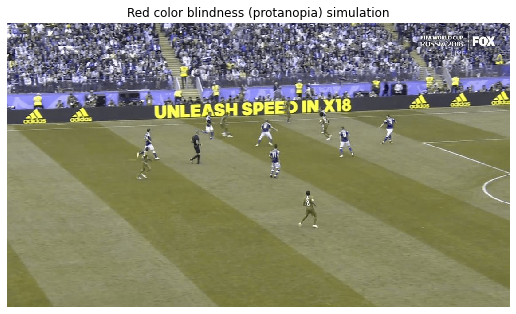

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (9,12))
ax = fig.add_subplot()
ax.imshow(red_sim, interpolation='none')
ax.set_title("Red color blindness (protanopia) simulation")
plt.axis("off") # Remove axes & tick marks

plt.show()

Yikes! This is how the match looked like for those with red color blindness. 

## Green color weakness (deuteranopia)
Now let's simulate green color weakness (deuteranopia). I will use a different photo of the same World Cup match, taken from a different angle.

<br>
<img src="world_cup2.jpg" width="50%vw" align="center"></img>

<br>
Let's try our simulation again.

In [9]:
# Load second photo
img2 = cv2.imread('./world_cup2.jpg')
# Reverse the color channels
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

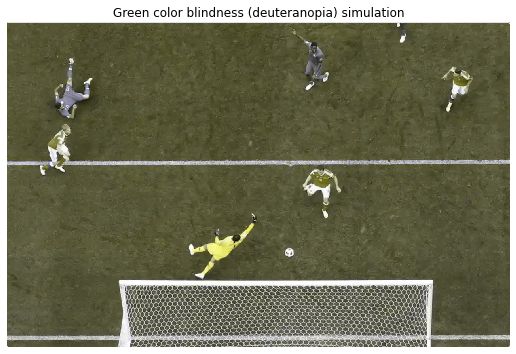

In [10]:
green_sim = colorblind.simulate_colorblindness(img2, colorblind_type='deuteranopia')

fig = plt.figure(figsize = (9,12))
ax = fig.add_subplot()
ax.imshow(green_sim, interpolation='none')
ax.set_title("Green color blindness (deuteranopia) simulation")
plt.axis("off") # Remove axes & tick marks
plt.show()

When the players are zoomed in, the all-agreen uniform looks gray for a person with green color weakness, whereas the red-on-white uniform looks to be the same color as the turf. Not a very pleasant viewing experience, FIFA.

## Blue-yellow color weakness (tritanopia)

Another type of color blindness is blue-yellow color blindness, or tritanopia. According to <a href="https://www.color-blindness.com/tritanopia-blue-yellow-color-blindness/">color-blindness.com</a>, "the wording blue-yellow color blindness is misleading. People affected by tritan color blindness confuse blue with green and yellow with violet."

To demonstrate this, I will use a third picture. Below are the combinations of uniform options for the Los Angeles Chargers - an American football team in the NFL whose primary colors are navy blue, powder blue, and gold. 

<br>
<img src="chargers2.jpeg" width="50%vw" align="center"></img>


<br>
Someone with tritanopia (blue/ yellow weakness) would see something more like this:

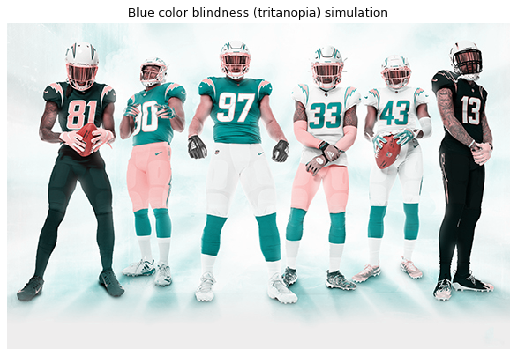

In [11]:
# Load third photo
img3 = cv2.imread('./chargers2.jpeg')
# Reverse the color channels
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Blue sim
blue_sim = colorblind.simulate_colorblindness(img3, colorblind_type='tritanopia')

fig = plt.figure(figsize = (9,12))
ax = fig.add_subplot()
ax.imshow(blue_sim, interpolation='none')
ax.set_title("Blue color blindness (tritanopia) simulation")
plt.axis("off") # Remove axes & tick marks
plt.show()

From the simulation above, someone with tritanopia probably think the Chargers' primary colors are black, teal and light pink. If you do have a blue-yellow color blindness, the player in uniform number 97 above probably looks more like this (spoilers: this is a different team - the Miami Dolphins). 

<br>
<img src="dolphins2.jpg" width="20%vw" align="center"></img>



<br>
This is why the NFL and college football teams tend to stick to having the home team wear color jerseys and visiting team white - that way, viewers with the common forms of colorblindness can still enjoy the games. (Football: 1 - Soccer: 0). 

# What does this have to do with Data Visualization/ Data Science?
<a type='anchor' name='ds'>
Now that we've established what color blindness is and how to use the `colorblind` package to simulate colorblindness in photos, let's discuss how this simple package can help data scientists create color blind-friendly figures.

Suppose you want to demonstrate a classification technique. Let's generate a toy plot with 2 classes and color them red and green. 

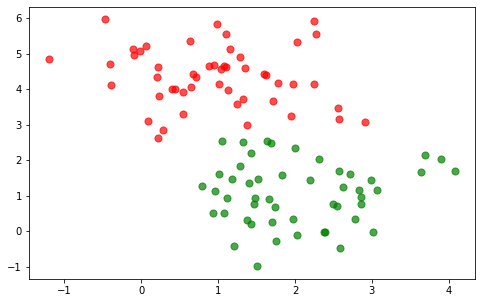

In [12]:
# Note: Code adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
from sklearn.datasets import make_blobs
import matplotlib

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.85)

fig, ax = plt.subplots(1, 1, figsize=(8,5))


plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha = 0.7,s=50, marker='o', color = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.7,s=50, marker='o', color = 'green')

plt.savefig('./blobs.jpg', dpi=300)

plt.show()


## Support vector machine <a type = 'anchor' name = 'svm'>

We want to demonstrate how Support Vector Machines would split these 2 clusters in 2 separate classes by drawing a line between 2 clusters. A person without red-green color blindness can probably tell where the SVM split should be. 

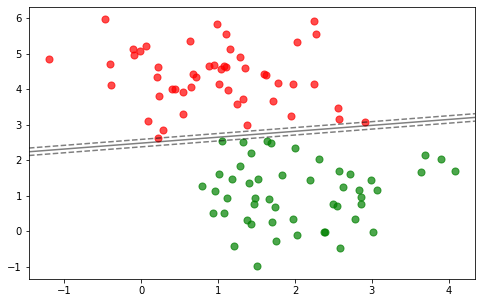

In [13]:
### Note: Code adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha =0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.scatter(X[y == 0, 0], X[y == 0, 1],alpha=0.70, s=50, marker='o', color = 'red')
ax.scatter(X[y == 1, 0], X[y == 1, 1],alpha=0.70, s=50, marker='o', color = 'green')
plot_svc_decision_function(model)
plt.savefig('./SVM.jpg', dpi=300)
plt.show()



## Colorblind SVM <a type='anchor' name ='sim_SVM'>
Now, let's simulate what the above figure appears like for someone with deuteranopia. Because `colorblind` is built on top of `OpenCV`, we still need to save the figure locally as a photo, then read it back into our notebook before we can use `colorblind`. Thankfully, all of this can be done within 1 code block in Jupyter Notebook.


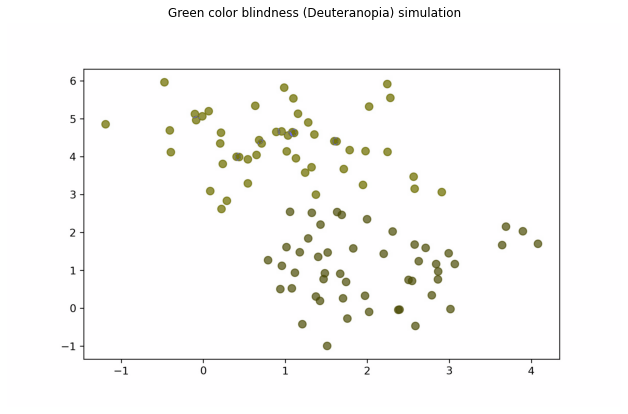

In [14]:
# Read back in the blobs generated above
img = cv2.imread('./blobs.jpg')
# Reverse the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # # Simulate deut
sim = colorblind.simulate_colorblindness(img, colorblind_type='deuteranopia')

fig, ax = plt.subplots(1, 1, figsize=(11,8))

plt.axis("off")
plt.title("Green color blindness (Deuteranopia) simulation")

plt.imshow(sim)
plt.savefig('./sim_blobs.jpg', dpi=300)
plt.show()

Thanks to the deuteranopia filter, we can see that it is nearly impossible to distinguish between the red and green  markers in our figure. When someone with red-green colorblindness looks at these 2 clusters, they would not be able to tell why SVM splits the dataset where it does. 

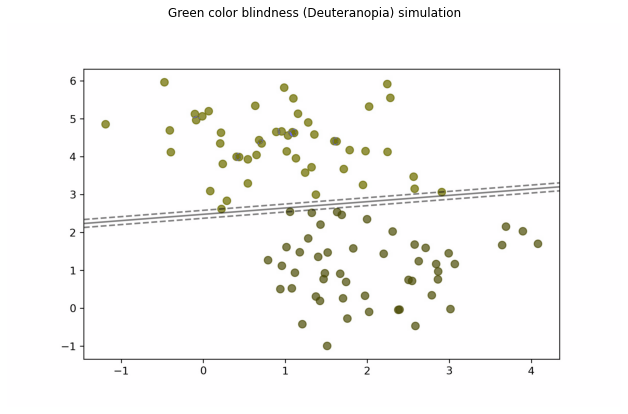

In [15]:
img = cv2.imread('./SVM.jpg')
img = img[...,::-1]

# Simulate pro
sim = colorblind.simulate_colorblindness(img, colorblind_type='deuteranopia')


fig, ax = plt.subplots(1, 1, figsize=(11,8))
plt.title("Green color blindness (Deuteranopia) simulation")

plt.imshow(sim)
plt.axis("off")
plt.savefig('./sim_SVM.jpg', dpi=300)
plt.show()

## Conclusion <a type='anchor' name='conclusion'>

The `colorblind` module allows us to do ad-hoc visual checks without having to disrupt our workflow or upload internal/ confidential/ work-in-progress data visualizations externally. 


### Redundant encoding <a type='anchor' name='redundant'>

What happens when the `colorblind` package shows that your visuals are perhaps not very colorblind-friendly? A strategy to fix this is to use redundant encoding - for example, imposing X markers on top of green points.

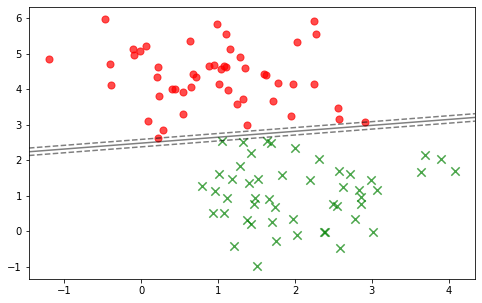

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

plt.scatter(X[y == 0, 0], X[y == 0, 1],alpha=0.70, s=50, marker='o', color = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1],alpha=0.70, s=70, marker='x', color = 'green')
plot_svc_decision_function(model)
plt.savefig('./SVM_redundant.jpg', dpi=300)
plt.show()

You know the drill! 

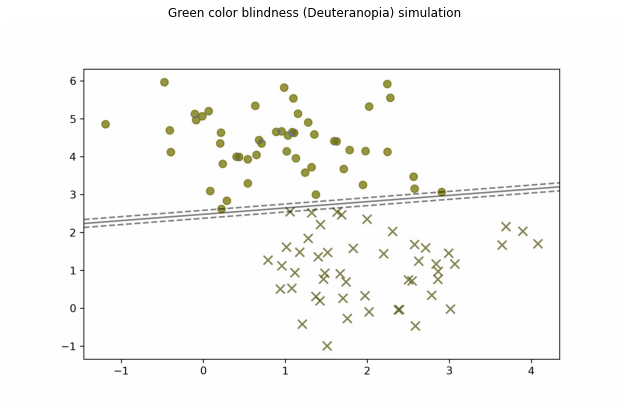

In [17]:
img = cv2.imread('./SVM_redundant.jpg')
img = img[...,::-1]

# Simulate pro
sim = colorblind.simulate_colorblindness(img, colorblind_type='deut')


fig, ax = plt.subplots(1, 1, figsize=(11,8))
plt.title("Green color blindness (Deuteranopia) simulation")

plt.imshow(sim)
plt.axis("off")

plt.savefig('./sim_SVM_redundant.jpg', dpi=300)

plt.show()

### Colorblind palletes <a type='anchor' name='palletes'>
In practice, there are resources to help practitioners create color blind-friendly data visualizations, such as different [colorblind palletes](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40) 